<a href="https://colab.research.google.com/github/ankp6737/machinelearning/blob/main/Time_Series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecasting Time Series Using ARIMA

##Import Libraries

Importing all the required libraries for analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

##Load the dataset

Time series deals with 2 columns, one is temporal ie: month in this case & another is the value to be forecasted ie: airplane passengers. To make plotting graphs easier, we set the index of pandas dataframe to the Month. During plots, the index will act by default as the x-axis & since it has only 1 more column, that will be automatically taken as the y-axis



In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data/AirPassengers.csv')
#partse the strings to datetime format
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
indexdf=df.set_index(['Month'])

###Top rows of the dataset

In [4]:
indexdf.head()    #return top rows of the dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


###Last rows of the dataset

In [5]:
indexdf.tail()    #return last rows of the dataset

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,433


###Basic Statistical Parameters of Dataset

In [6]:
indexdf.describe()    #print basic statistical information about the dataset

,#Passengers
count,144.000000
mean,280.305556
std,119.975188
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


##Visualize the Data

From the plot below, we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data

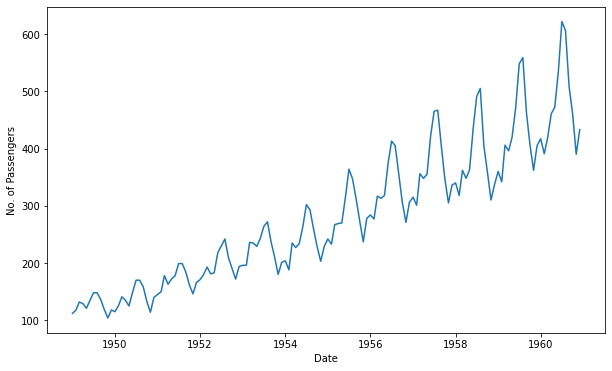

In [7]:
plt.xlabel("Date")
plt.ylabel("No. of Passengers")
plt.plot(indexdf)

##Determine Rolling Statistics

Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [8]:
dfmean=indexdf.rolling(window=12).mean()      #calculating the rolling mean of the dataset
dfstd=indexdf.rolling(window=12).std()        #calculating the rolling std of the dataset
print(dfmean, dfstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.250000

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.685994

[144 rows x 1 columns]


###Plot rolling statistics


Plotting the Rolling Mean and Standard Deviation, which has window of 12
By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

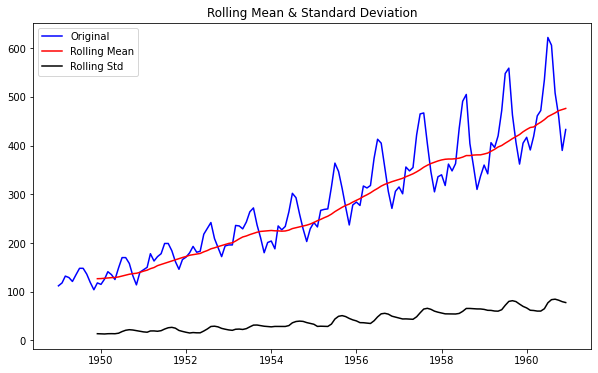

In [9]:
orig = plt.plot(indexdf, color='blue', label='Original')        #plotting the original data
mean = plt.plot(dfmean, color='red', label='Rolling Mean')      #plotting the rolling mean of the data
std = plt.plot(dfstd, color='black', label='Rolling Std')       #plotting the rolling std of the data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')                  #giving title to the graph
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

##Perform Augmented Dickey–Fuller test:

In [10]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexdf['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey Fuller Test:
Test Statistic                   0.827372
p-value                          0.992065
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

##Data Transformation to achieve Stationarity

There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

###Log Transform

In [11]:
passenger_log = np.log(indexdf['#Passengers'])      #log transformation of the original dataset
passenger_sqrt = np.sqrt(indexdf['#Passengers'])    #squareroot transformation of the original dataset
passenger_cbrt = np.cbrt(indexdf['#Passengers'])    #cuberoot transformation of the original dataset

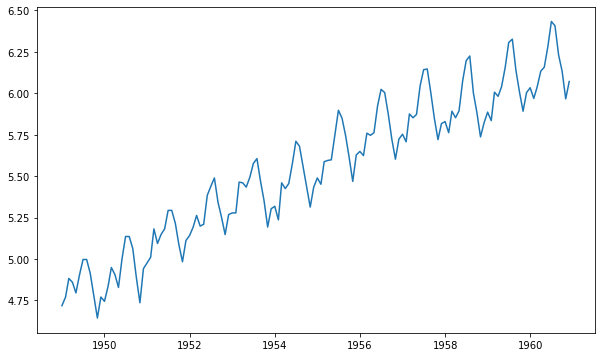

In [12]:
plt.plot(passenger_log)       #plotting the log transformed data

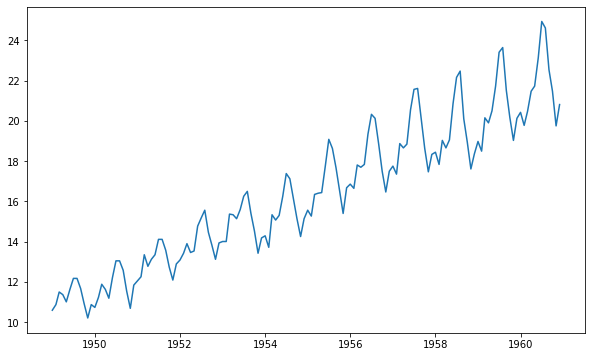

In [13]:
plt.plot(passenger_sqrt)      #plotting the square root transformed data

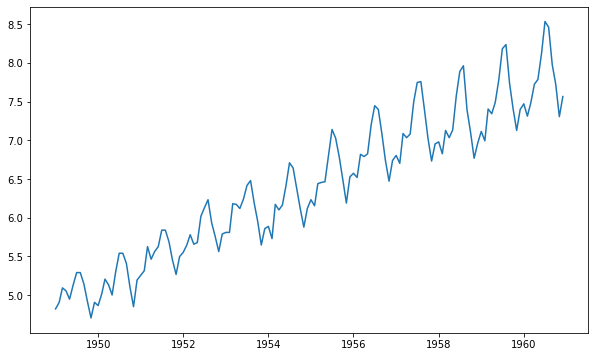

In [14]:
plt.plot(passenger_cbrt)      #plotting the cuberoot transformed data

The below transformation is required to make series stationary

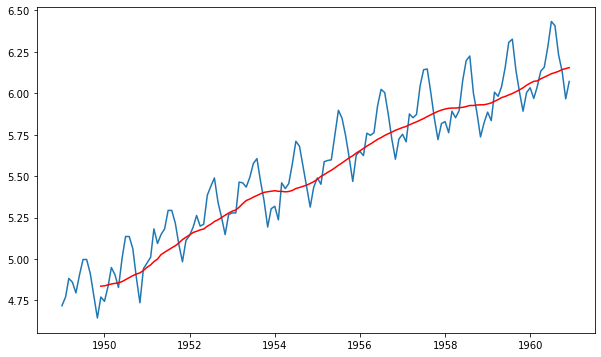

In [15]:
rollmeanlog=passenger_log.rolling(window=12).mean()       #calculating rolling mean of log transformed data
rollstdlog=passenger_log.rolling(window=12).std()         #calculating rolling std of log transformed data
plt.plot(passenger_log)                                   #plotting the log transformed data
plt.plot(rollmeanlog, color='red')                        #plotting the rolling mean of log transformed data
#plt.plot(rollstd,color='black')

From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. 

Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:

logscaleL=stationarypart(L1)+trend(LT)

movingavgoflogscaleA=stationarypart(A1)+trend(AT)

resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)

Since, L & A are series & it moving avg, their trend will be more or less same, Hence

LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1 , our final non-trend curve

In [16]:
Mvavglogpassenger=passenger_log-rollmeanlog     #subtracting mean of log transformed data from log transformed data

In [17]:
Mvavglogpassenger.head(15)      #print first 15 rows of the data


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [18]:
Mvavglogpassenger.dropna(inplace=True)          #Remove NAN values
Mvavglogpassenger.head(15)                      #print first 15 rows of the data

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: #Passengers, dtype: float64

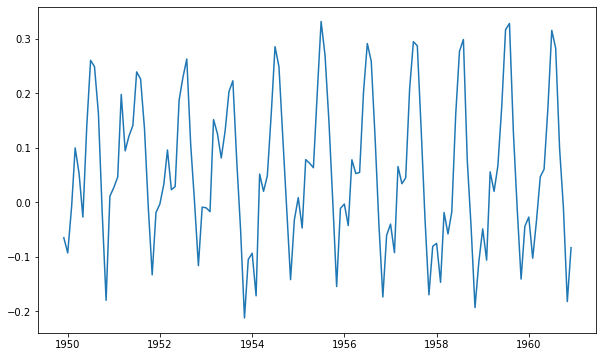

In [19]:
plt.plot(Mvavglogpassenger)           #plot the data

Defining a function for computing and plotting rolling statistics and performing Dickey-Fuller test

In [20]:
def rollanddftest(data):
  #Determine rolling statistics
  movingAverage = data.rolling(window=12).mean()
  movingSTD = data.rolling(window=12).std()
  
  #Plot rolling statistics
  orig = plt.plot(data, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey–Fuller test:
  print('Results of Dickey Fuller Test:')
  dftest = adfuller(data, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
    

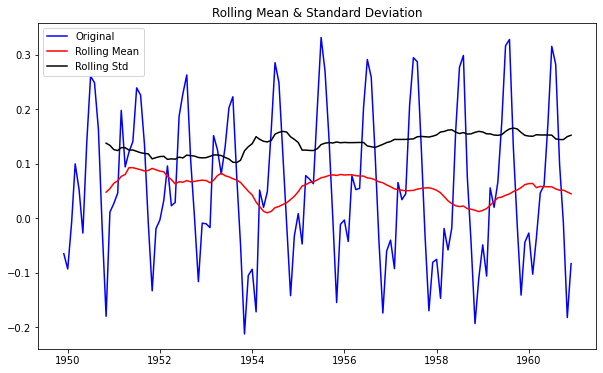

Results of Dickey Fuller Test:
Test Statistic                  -3.166112
p-value                          0.022032
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
rollanddftest(Mvavglogpassenger)          #computing the rolling statistics and Dickey-Fuller test on the trasformed data

From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value has reduced from 0.99 to 0.022.
The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary.
But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.


###Square Root Transform

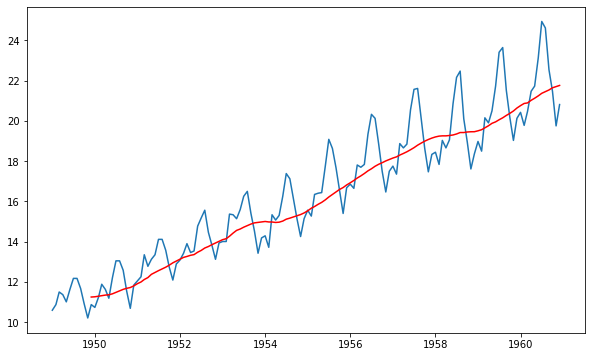

In [22]:
rollmeansqrt=passenger_sqrt.rolling(window=12).mean()       #calculating rolling mean of the square root transformed data
rollstdsqrt=passenger_sqrt.rolling(window=12).std()         #calculating rolling std of the square root transformed data
plt.plot(passenger_sqrt)                                    #plotting the square root transformed data
plt.plot(rollmeansqrt, color='red')                         #plotting the rolling mean of the square root transformed data

In [23]:
Mvavgsqrtpassenger=passenger_sqrt-rollmeansqrt            #difference of the square root transformed data and its rolling mean
Mvavgsqrtpassenger.dropna(inplace=True)                    #drom NAN rows in the dataset after the difference

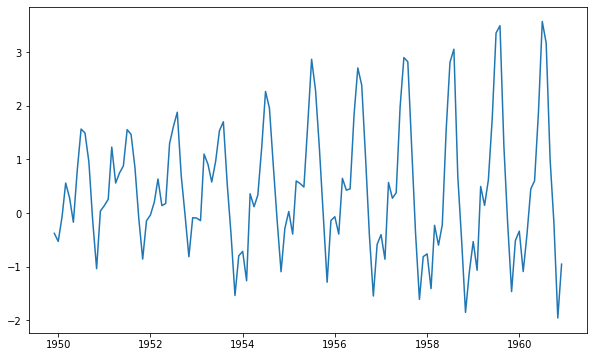

In [24]:
plt.plot(Mvavgsqrtpassenger)                              #plotting the transformed data

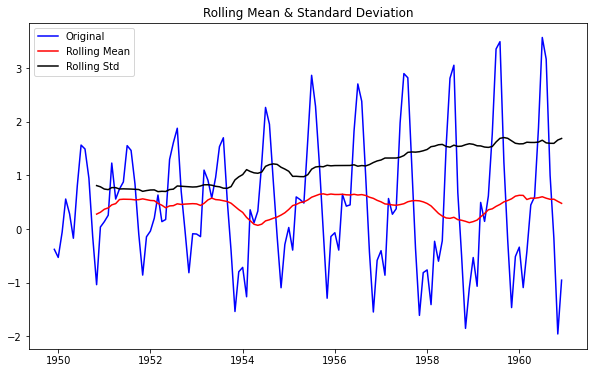

Results of Dickey Fuller Test:
Test Statistic                  -3.560413
p-value                          0.006565
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [25]:
rollanddftest(Mvavgsqrtpassenger)          #computing the rolling statistics and Dickey-Fuller test on the trasformed data

From above graph, we observe that:

p-value has reduced from 0.022 to 0.006. The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary. But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current.


###Cube Root Transformation

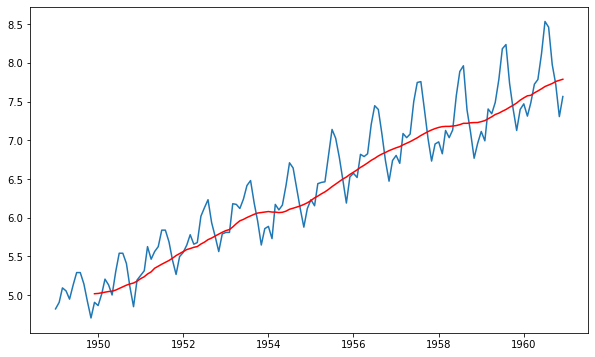

In [26]:
rollmeancbrt=passenger_cbrt.rolling(window=12).mean()   #calculating the rolling mean of the cube root transformed data
rollstdcbrt=passenger_cbrt.rolling(window=12).std()     #calculating the rolling std of the cube root transformed data
plt.plot(passenger_cbrt)                                #plotting the cube root transformed data
plt.plot(rollmeancbrt, color='red')                     #plotting the rolling mean of the cube root transformed data

In [27]:
Mvavgcbrtpassenger=passenger_cbrt-rollmeancbrt        #difference of the cube root transformed data and its rolling mean
Mvavgcbrtpassenger.dropna(inplace=True)               #dropping the rows with NAN after the difference

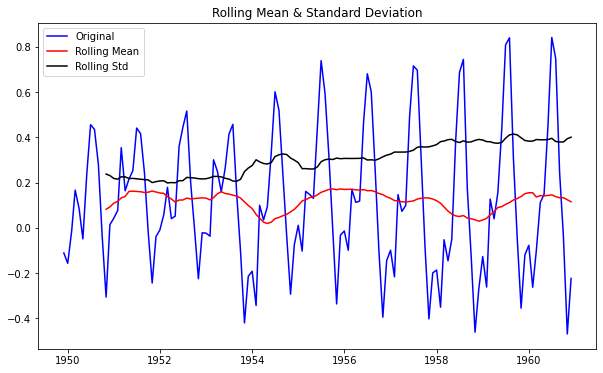

Results of Dickey Fuller Test:
Test Statistic                  -3.507144
p-value                          0.007806
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [28]:
rollanddftest(Mvavgcbrtpassenger)                     #computing the rolling statistics and Dickey-Fuller test on the trasformed data

From above graph, we observe that:

p-value has increased from 0.006 to 0.007. The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary. But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current.

###Eponential Decay Transformation

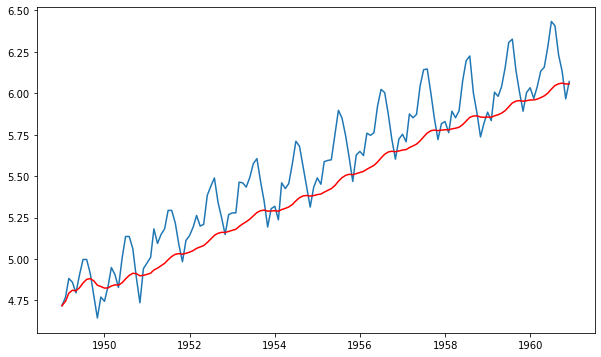

In [29]:
passenger_expdecay=passenger_log.ewm(halflife=12, min_periods=0, adjust=True).mean()      #performing exponential decay transformation of the log transformed data
plt.plot(passenger_log)         #plotting the log transformed data
plt.plot(passenger_expdecay, color='red')       #plotting the exponential decay transformed data

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

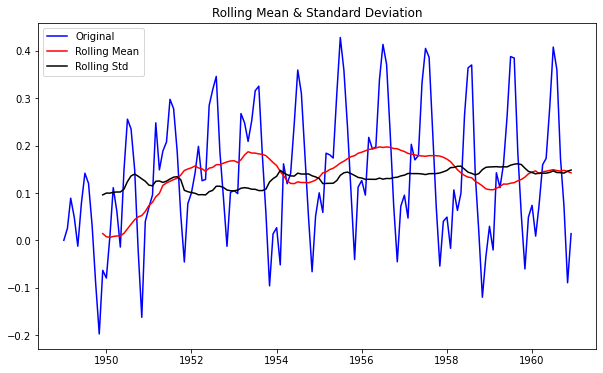

Results of Dickey Fuller Test:
Test Statistic                  -3.603614
p-value                          0.005692
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [30]:
Mvavgexpdpassenger = passenger_log - passenger_expdecay   #difference of log transformed data and exponentail decay transformed data
rollanddftest(Mvavgexpdpassenger)     #computing the rolling statistics and performing Dicky-Fuller test

We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.
Also,

p-value has decreased from 0.007 to 0.005.
Test Statistic value is very much closer to the Critical values.
Both the points say that our current transformation is better than the previous logarithmic transformation. Even though, we couldn't observe any differences by visually looking at the graphs, the tests confirmed decay to be much better.

###Time Shift Transformation

But lets try one more time & find if an even better solution exists. We will try out the simple time shift technique, which is simply:

Given a set of observation on the time series:

x0,x1,x2,x3,....xn 


The shifted values will be:

null,x0,x1,x2,....xn  <---- basically all xi's shifted by 1 pos to right


Thus, the time series with time shifted values are:

null,(x1−x0),(x2−x1),(x3−x2),(x4−x3),....(xn−xn−1)

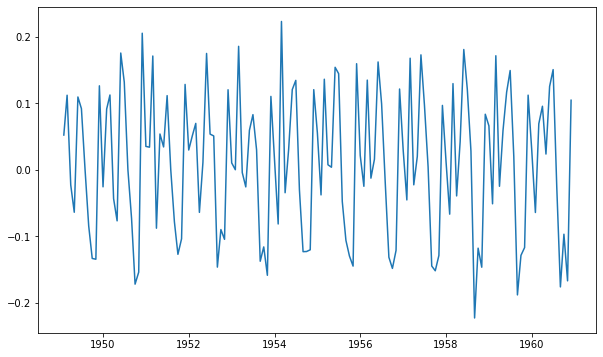

In [31]:
#Time Shift Transformation 
dflogdiffshift = passenger_log - passenger_log.shift()
plt.plot(dflogdiffshift)

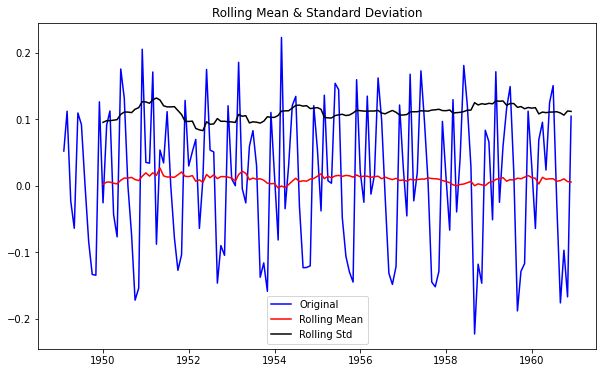

Results of Dickey Fuller Test:
Test Statistic                  -2.721864
p-value                          0.070331
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [32]:
dflogdiffshift.dropna(inplace=True)       #droping rows with NAN after transformation
rollanddftest(dflogdiffshift)             #computing the rolling statistics and performing Dicky-Fuller test on the transformed data

From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary. But, the ADCF test shows us that:

p-value of 0.07 is not as good as 0.005 of exponential decay.
Test Statistic value not as close to the critical values as that for exponential decay.
We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.

##Seasonal Decomposition

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

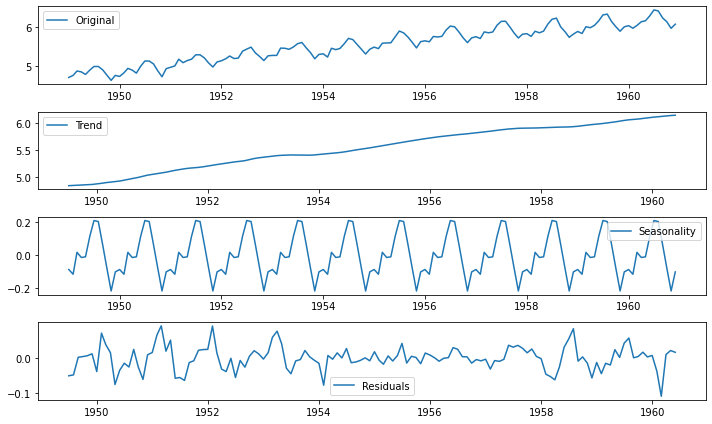

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose       #import library for seasonal decomposition
decomposition = seasonal_decompose(passenger_log)              #decomposing the log transformed data

trend = decomposition.trend                 #storing the trend component of the data
seasonal = decomposition.seasonal           #storing the seasonal component of the data
residual = decomposition.resid              #storing the residual or noise component of the data

#plotting the Original log transformed dataset
plt.subplot(411)
plt.plot(passenger_log, label='Original')
plt.legend(loc='best')

#plotting the trend component of the log transformed dataset
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

#plotting the seasonality component of the log transformed dataset
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

#plotting the noise or residual compoenent of the lof transformed dataset
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Checking the stationarity of Time Series residual component

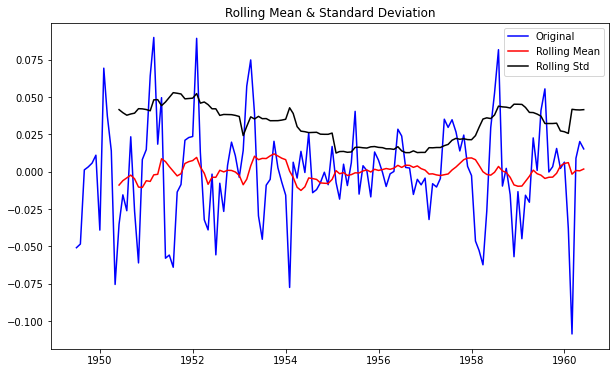

Results of Dickey Fuller Test:
Test Statistic                -6.332426e+00
p-value                        2.884461e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [59]:
airpass_decompose = residual
airpass_decompose.dropna(inplace=True)
rollanddftest(airpass_decompose) 


##Plotting ACF & PACF

In [38]:
from statsmodels.tsa.stattools import acf, pacf     #import libraries for ACF and PACF graph
lag_acf = acf(Mvavglogpassenger, nlags=20)                #computing ACF
lag_pacf = pacf(Mvavglogpassenger, nlags=20, method='ols')    #computing PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


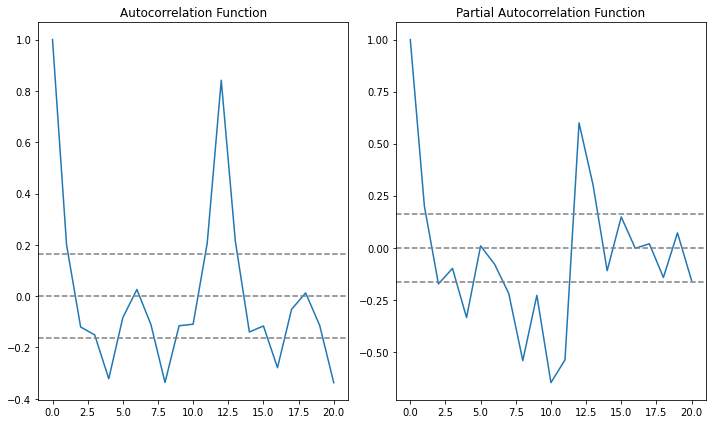

In [40]:
#ACF & PACF plots

lag_acf = acf(dflogdiffshift, nlags=20)
lag_pacf = pacf(dflogdiffshift, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


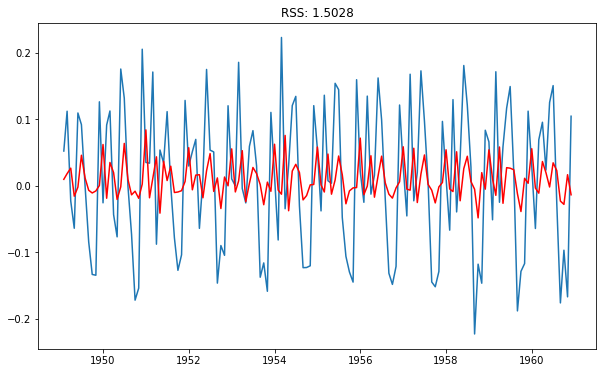

In [43]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(passenger_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - dflogdiffshift)**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


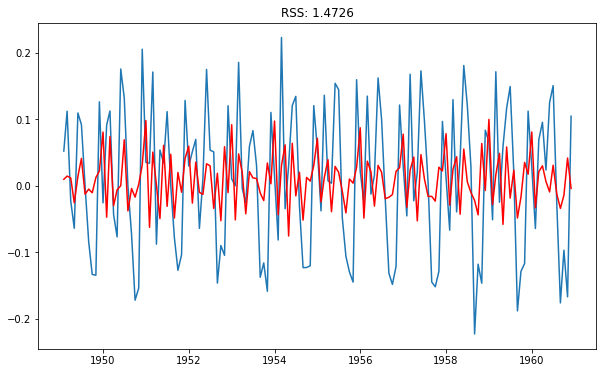

In [45]:
#MA Model
model = ARIMA(passenger_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dflogdiffshift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - dflogdiffshift)**2))
print('Plotting MA model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


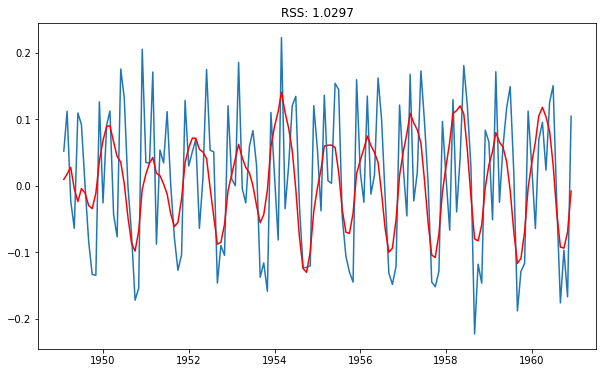

In [47]:
# AR+I+MA = ARIMA model
model = ARIMA(passenger_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dflogdiffshift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dflogdiffshift)**2))
print('Plotting ARIMA model')

In [48]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009585
1949-03-01    0.017476
1949-04-01    0.027623
1949-05-01   -0.004521
1949-06-01   -0.023846
dtype: float64


In [49]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009585
1949-03-01    0.027062
1949-04-01    0.054685
1949-05-01    0.050164
1949-06-01    0.026318
                ...   
1960-08-01    1.374215
1960-09-01    1.281908
1960-10-01    1.187992
1960-11-01    1.118191
1960-12-01    1.110207
Length: 143, dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(passenger_log.iloc[0], index=passenger_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728084
1949-03-01    4.745561
1949-04-01    4.773184
1949-05-01    4.768663
dtype: float64

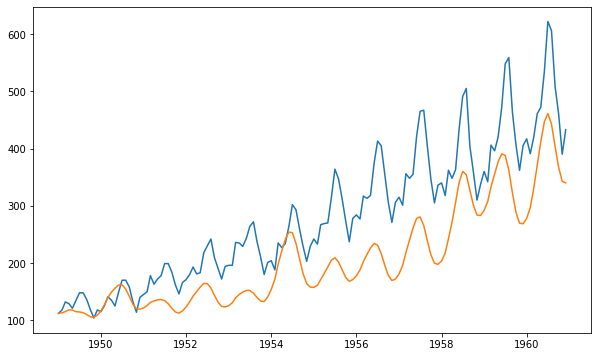

In [55]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexdf)
plt.plot(predictions_ARIMA)

In [56]:
passenger_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.070738
Name: #Passengers, Length: 144, dtype: float64

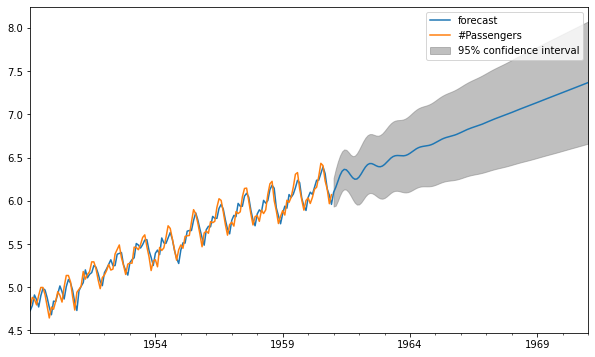

In [58]:
#We have 144(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.
results_ARIMA.plot_predict(1,264) 
x=results_ARIMA.forecast(steps=120)